# 的士调度 Taxi-v2

In [1]:
%matplotlib inline
import numpy as np
np.random.seed(0)
import pandas as pd
import matplotlib.pyplot as plt
import gym

### 环境使用

In [2]:
env = gym.make('Taxi-v2')
env.seed(0)
print('观察空间 = {}'.format(env.observation_space))
print('动作空间 = {}'.format(env.action_space))
print('状态数量 = {}'.format(env.observation_space.n))
print('动作数量 = {}'.format(env.action_space.n))

观察空间 = Discrete(500)
动作空间 = Discrete(6)
状态数量 = 500
动作数量 = 6


In [3]:
state = env.reset()
taxirow, taxicol, passloc, destidx = env.unwrapped.decode(state)
print(taxirow, taxicol, passloc, destidx)
print('的士位置 = {}'.format((taxirow, taxicol)))
print('乘客位置 = {}'.format(env.unwrapped.locs[passloc]))
print('目标位置 = {}'.format(env.unwrapped.locs[destidx]))
env.render()

0 1 1 2
的士位置 = (0, 1)
乘客位置 = (0, 4)
目标位置 = (4, 0)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [4]:
env.step(0)

(126, -1, False, {'prob': 1.0})

In [5]:
env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)


### SARSA 算法

In [6]:
class SARSAAgent:
    def __init__(self, env, gamma=0.9, learning_rate=0.1, epsilon=.01):
        self.gamma = gamma
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.action_n = env.action_space.n
        self.q = np.zeros((env.observation_space.n, env.action_space.n))
        
    def decide(self, state):
        if np.random.uniform() > self.epsilon:
            action = self.q[state].argmax()
        else:
            action = np.random.randint(self.action_n)
        return action
    
    def learn(self, state, action, reward, next_state, done, next_action):
        u = reward + self.gamma * \
                self.q[next_state, next_action] * (1. - done)
        td_error = u - self.q[state, action]
        self.q[state, action] += self.learning_rate * td_error

In [7]:
def play_sarsa(env, agent, train=False, render=False):
    episode_reward = 0
    observation = env.reset()
    action = agent.decide(observation)
    while True:
        if render:
            env.render()
        next_observation, reward, done, _ = env.step(action)
        episode_reward += reward
        next_action = agent.decide(next_observation) # 终止状态时此步无意义
        if train:
            agent.learn(observation, action, reward, next_observation,
                    done, next_action)
        if done:
            break
        observation, action = next_observation, next_action
    return episode_reward

平均回合奖励 = 671 / 100 = 6.71


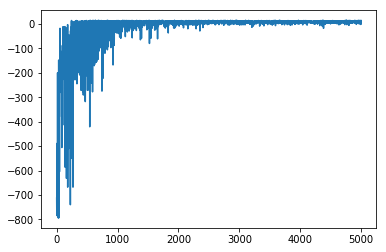

In [8]:
agent = SARSAAgent(env)

# 训练
episodes = 5000
episode_rewards = []
for episode in range(episodes):
    episode_reward = play_sarsa(env, agent, train=True)
    episode_rewards.append(episode_reward)
    
plt.plot(episode_rewards)

# 测试
agent.epsilon = 0. # 取消探索

episode_rewards = [play_sarsa(env, agent) for _ in range(100)]
print('平均回合奖励 = {} / {} = {}'.format(sum(episode_rewards),
        len(episode_rewards), np.mean(episode_rewards)))

显示最优价值估计

In [9]:
pd.DataFrame(agent.q)

,0,1,2,3,4,5
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-2.600026,-2.593051,-2.612598,-1.715516,4.249763,-3.772742
2,-2.067980,-1.351987,-1.676313,-2.233975,7.439644,-3.734128
3,-2.944770,-3.051257,-2.687768,-2.947658,1.979383,-4.174560
4,-3.642111,-4.449279,-4.419784,-4.465809,-5.593674,-5.602355
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,-4.887117,-5.017114,-4.989397,-4.996423,-5.593139,-5.603846
7,-4.180342,-4.177074,-3.744672,-4.192496,-5.595174,-4.642345
8,0.324690,-3.624851,-3.536758,-3.606046,-4.627411,-3.774342
9,-3.701803,-5.172822,-5.172463,-5.168523,-5.593471,-5.603375


显示最优策略估计

In [10]:
policy = np.eye(agent.action_n)[agent.q.argmax(axis=-1)] 
pd.DataFrame(policy)

,0,1,2,3,4,5
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0


### 期望 SARSA

In [11]:
class ExpectedSARSAAgent:
    def __init__(self, env, gamma=0.9, learning_rate=0.1, epsilon=.01):
        self.gamma = gamma
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.q = np.zeros((env.observation_space.n, env.action_space.n))
        self.action_n = env.action_space.n
        
    def decide(self, state):
        if np.random.uniform() > self.epsilon:
            action = self.q[state].argmax()
        else:
            action = np.random.randint(self.action_n)
        return action
    
    def learn(self, state, action, reward, next_state, done):
        v = (self.q[next_state].sum() * self.epsilon + \
                self.q[next_state].max() * (1. - self.epsilon))
        u = reward + self.gamma * v * (1. - done)
        td_error = u - self.q[state, action]
        self.q[state, action] += self.learning_rate * td_error

In [12]:
def play_qlearning(env, agent, train=False, render=False):
    episode_reward = 0
    observation = env.reset()
    while True:
        if render:
            env.render()
        action = agent.decide(observation)
        next_observation, reward, done, _ = env.step(action)
        episode_reward += reward
        if train:
            agent.learn(observation, action, reward, next_observation,
                    done)
        if done:
            break
        observation = next_observation
    return episode_reward

平均回合奖励 = 887 / 100 = 8.87


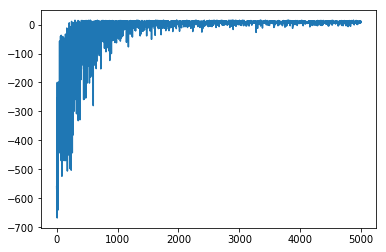

In [13]:
agent = ExpectedSARSAAgent(env)

# 训练
episodes = 5000
episode_rewards = []
for episode in range(episodes):
    episode_reward = play_qlearning(env, agent, train=True)
    episode_rewards.append(episode_reward)
    
plt.plot(episode_rewards)

# 测试
agent.epsilon = 0. # 取消探索

episode_rewards = [play_qlearning(env, agent) for _ in range(100)]
print('平均回合奖励 = {} / {} = {}'.format(sum(episode_rewards),
        len(episode_rewards), np.mean(episode_rewards)))

### Q 学习

In [14]:
class QLearningAgent:
    def __init__(self, env, gamma=0.9, learning_rate=0.1, epsilon=.01):
        self.gamma = gamma
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.action_n = env.action_space.n
        self.q = np.zeros((env.observation_space.n, env.action_space.n))
        
    def decide(self, state):
        if np.random.uniform() > self.epsilon:
            action = self.q[state].argmax()
        else:
            action = np.random.randint(self.action_n)
        return action
    
    def learn(self, state, action, reward, next_state, done):
        u = reward + self.gamma * self.q[next_state].max() * (1. - done)
        td_error = u - self.q[state, action]
        self.q[state, action] += self.learning_rate * td_error

平均回合奖励 = 855 / 100 = 8.55


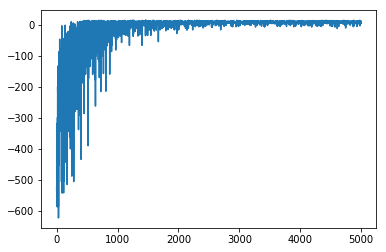

In [15]:
agent = QLearningAgent(env)

# 训练
episodes = 5000
episode_rewards = []
for episode in range(episodes):
    episode_reward = play_qlearning(env, agent, train=True)
    episode_rewards.append(episode_reward)
    
plt.plot(episode_rewards)

# 测试
agent.epsilon = 0. # 取消探索

episode_rewards = [play_qlearning(env, agent) for _ in range(100)]
print('平均回合奖励 = {} / {} = {}'.format(sum(episode_rewards),
        len(episode_rewards), np.mean(episode_rewards)))

### 双重 Q 学习

In [16]:
class DoubleQLearningAgent:
    def __init__(self, env, gamma=0.9, learning_rate=0.15, epsilon=.01):
        self.gamma = gamma
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.action_n = env.action_space.n
        self.q0 = np.zeros((env.observation_space.n, env.action_space.n))
        self.q1 = np.zeros((env.observation_space.n, env.action_space.n))
        
    def decide(self, state):
        if np.random.uniform() > self.epsilon:
            action = (self.q0 + self.q1)[state].argmax()
        else:
            action = np.random.randint(self.action_n)
        return action
    
    def learn(self, state, action, reward, next_state, done):
        if np.random.randint(2):
            self.q0, self.q1 = self.q1, self.q0
        a = self.q0[next_state].argmax()
        u = reward + self.gamma * self.q1[next_state, a] * (1. - done)
        td_error = u - self.q0[state, action]
        self.q0[state, action] += self.learning_rate * td_error

平均回合奖励 = 882 / 100 = 8.82


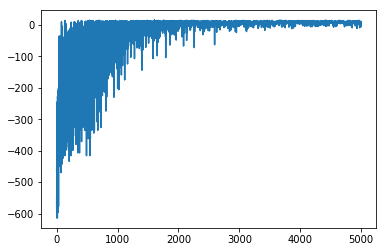

In [17]:
agent = DoubleQLearningAgent(env)

# 训练
episodes = 5000
episode_rewards = []
for episode in range(episodes):
    episode_reward = play_qlearning(env, agent, train=True)
    episode_rewards.append(episode_reward)
    
plt.plot(episode_rewards)

# 测试
agent.epsilon = 0. # 取消探索

episode_rewards = [play_qlearning(env, agent) for _ in range(100)]
print('平均回合奖励 = {} / {} = {}'.format(sum(episode_rewards),
        len(episode_rewards), np.mean(episode_rewards)))

### SARSA($\lambda $) 算法

In [18]:
class SARSALambdaAgent(SARSAAgent):
    def __init__(self, env, lambd=0.5, beta=1.,
            gamma=0.9, learning_rate=0.1, epsilon=.01):
        super().__init__(env, gamma=gamma, learning_rate=learning_rate,
                epsilon=epsilon)
        self.lambd = lambd
        self.beta = beta
        self.e = np.zeros((env.observation_space.n, env.action_space.n))
        
    def learn(self, state, action, reward, next_state, done, next_action):
        # 更新资格迹
        self.e *= (self.lambd * self.gamma)
        self.e[state, action] = 1. + self.beta * self.e[state, action]

        # 更新价值
        u = reward + self.gamma * \
                self.q[next_state, next_action] * (1. - done)
        td_error = u - self.q[state, action]
        self.q += self.learning_rate * self.e * td_error
        if done:
            self.e *= 0.

平均回合奖励 = 843 / 100 = 8.43


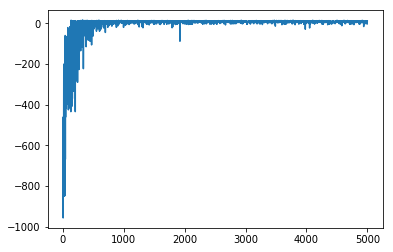

In [19]:
agent = SARSALambdaAgent(env)

# 训练
episodes = 5000
episode_rewards = []
for episode in range(episodes):
    episode_reward = play_sarsa(env, agent, train=True)
    episode_rewards.append(episode_reward)
    
plt.plot(episode_rewards)

# 测试
agent.epsilon = 0. # 取消探索

episode_rewards = [play_sarsa(env, agent, train=False) for _ in range(100)]
print('平均回合奖励 = {} / {} = {}'.format(sum(episode_rewards),
        len(episode_rewards), np.mean(episode_rewards)))